In [189]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint

# Import API key
from config import api_key

base_url = "https://api.nytimes.com/svc/mostpopular/v2/"
viewed = "viewed/"
shared = "shared/"
emailed = "emailed/"
time_1 = "1.json?"
time_7 = "7.json?"
time_30 = "30.json?"

In [190]:
# Most Viewed 30 days

query_url = base_url + viewed + time_30 + "api-key=" + api_key

articles = requests.get(query_url).json()
articles = articles['results']

#pprint(articles)

In [191]:
# Most Viewed cont.

#prepare lists
title = []
section = []
#keywords = []
pop_rank = []

#fill lists with data
for article in articles:
    title.append(article['title'])
    section.append(article['section'])
    #keywords.append(article['des_facet'])
    pop_rank.append(article['views'])

#convert lists to dict & dataframe
viewed_30 = {'Title': title, 'Section': section, 'Popularity Rank': pop_rank}
viewed_30 = pd.DataFrame(viewed_30)
viewed_30

,Title,Section,Popularity Rank
0,Jonathan Van Ness of ‘Queer Eye’ Comes Out,Style,1
1,Antonio Brown Accused of Rape in a Lawsuit,Sports,2
2,Trump Has Disqualified Himself From Running in...,Opinion,3
3,White House Knew of Whistle-Blower’s Allegatio...,U.S.,4
4,Brett Kavanaugh Fit In With the Privileged Kid...,Sunday Review,5
5,Nancy Pelosi Announces Formal Impeachment Inqu...,U.S.,6
6,Document: Read the Whistle-Blower Complaint,U.S.,7
7,Donald Trump vs. the United States of America,Opinion,8
8,Full Document: Trump’s Call With the Ukrainian...,U.S.,9
9,The Internet Is Overrun With Images of Child S...,U.S.,10


In [192]:
section_pop30 = viewed_30['Section'].value_counts()
#section_pop30.plot(kind = "bar")

In [193]:
# Most Viewed 7 days
query_url = base_url + viewed + time_7 + "api-key=" + api_key

articles = response = requests.get(query_url).json()
articles = articles['results']

#prepare lists
title = []
section = []
#keywords = []
pop_rank = []

#fill lists with data
for article in articles:
    title.append(article['title'])
    section.append(article['section'])
    #keywords.append(article['des_facet'])
    pop_rank.append(article['views'])

#convert lists to dict & dataframe
viewed_7 = {'Title': title, 'Section': section, 'Popularity Rank': pop_rank}
viewed_7 = pd.DataFrame(viewed_7)
viewed_7

,Title,Section,Popularity Rank
0,Trump Has Disqualified Himself From Running in...,Opinion,1
1,"Shoot Migrants’ Legs, Build Alligator Moat: Be...",U.S.,2
2,The Internet Is Overrun With Images of Child S...,U.S.,3
3,Trump Pressed Australian Leader to Help Barr I...,U.S.,4
4,"Eat Less Red Meat, Scientists Said. Now Some B...",Health,5
5,Schiff Got Early Account of Accusations as Whi...,U.S.,6
6,Lebanon’s Prime Minister Gave $16 Million to S...,World,7
7,‘Joker’ Review: Are You Kidding Me?,Movies,8
8,Former Dallas Police Officer Is Guilty of Murd...,U.S.,9
9,Impeaching the Peach One,Opinion,10


In [194]:
section_pop7 = viewed_7['Section'].value_counts()
#section_pop7.plot(kind = "bar")

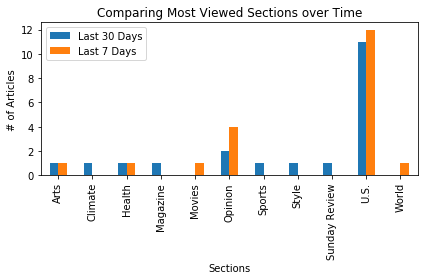

In [195]:
# Most Viewed - Comparing 30 days vs. 7 days
view_merge = pd.concat([section_pop30, section_pop7], axis=1,sort=True, join='outer', keys=['Last 30 Days', 'Last 7 Days'])

# plot comparison
view_merge.plot(kind="bar", title="Comparing Most Viewed Sections over Time")

# Set labels
plt.ylabel("# of Articles")
plt.xlabel("Sections")

plt.tight_layout()